ERSIP Lab Sessions    
Lab 3: Spatial-based processing  
25-09-2025

Experimenting the effect of different kernels

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

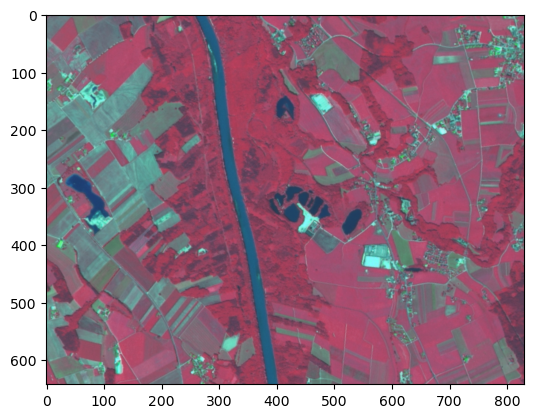

In [2]:
# load image
src = rasterio.open(r'Data\spot2005_pansharpened_utm33_subset_NIRRGMIR.tif')
img = src.read([1,2,3])  # read RGB bands 
rgb = np.transpose(img, (1, 2, 0))

# display image
from matplotlib import pyplot as plt
plt.imshow(rgb)
plt.show()

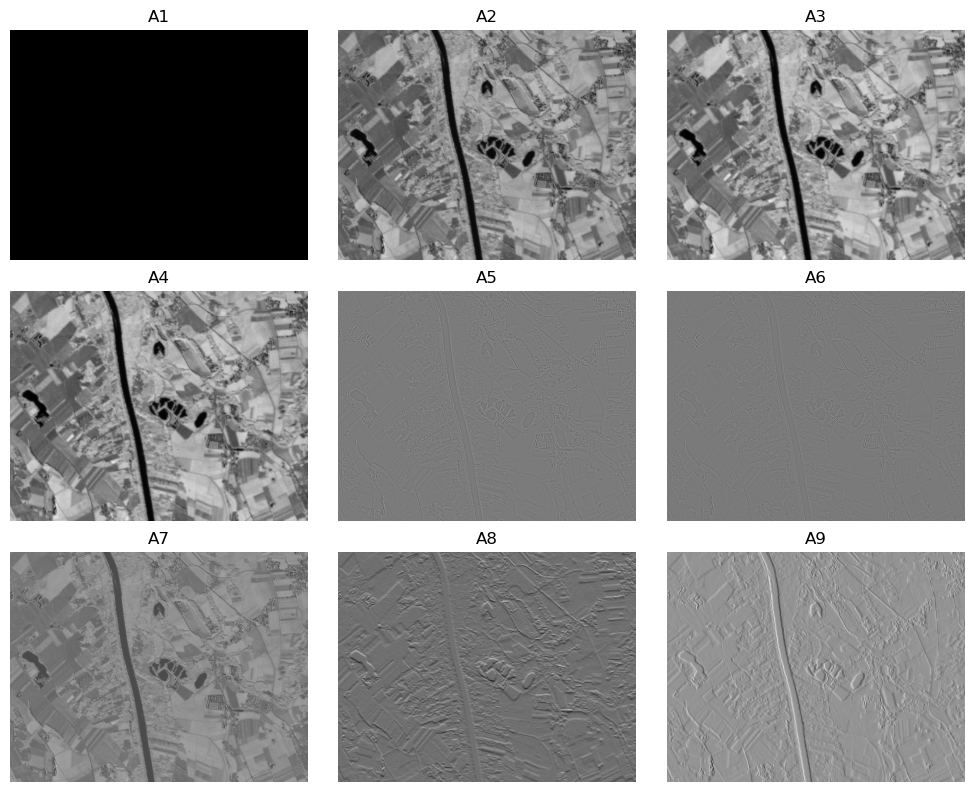

In [6]:
from scipy.signal import convolve2d

img = src.read(1)  # read first band

# define kernels
kernels = {
    "A1": np.zeros((3,3)),
    "A2": np.array([[0,0,0],[0,1,0],[0,0,0]]),
    "A3": np.ones((3,3))/9,
    "A4": np.array([[1,2,1],[2,4,2],[1,2,1]]),
    "A5": np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
    "A6": np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]),
    "A7": np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
    "A8": np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
    "A9": np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
}


#Filter images
filtered_images = {}
for name, kernel in kernels.items():
    filtered = convolve2d(img, kernel, mode='same', boundary='symm')
    filtered_images[name] = filtered

# Plot results
fig, axes = plt.subplots(3, 3, figsize=(10,8))
axes = axes.flatten()  # flatten for easy indexing

for i, name in enumerate(filtered_images):
    axes[i].imshow(filtered_images[name], cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

1. For a given spatial operator, compare the filtering effect and CPU time when increasing the kernel size.

In [ ]:
# mean filtering
# 3x3 vs 5x5 kernel
import time

kernel_3x3 = np.ones((3,3))/9
kernel_9x9 = np.ones((9,9))/81

start = time.process_time()
filtered_3x3 = convolve2d(img, kernel_3x3, mode='same', boundary='symm')
end = time.process_time()   
print(f"3x3 kernel time: {end - start} seconds")

start = time.process_time()
filtered_9x9 = convolve2d(img, kernel_9x9, mode='same', boundary='symm')
end = time.process_time()   
print(f"9x9 kernel time: {end - start} seconds")

3x3 kernel time: 0.046875 seconds
5x5 kernel time: 0.0625 seconds


2. For a given spatial operator, compare the filtering effect and CPU time for a 2D separable kernel and its 1D alternatives.

In [15]:
# 2D  kernel
kernel_2d = np.array([[1,2,1],
                      [2,4,2],
                      [1,2,1]]) / 16

# Separable 1D vectors
kernel_1d = np.array([1,2,1]) / 4

start = time.process_time()
filtered1 = convolve2d(img, kernel_2d, mode='same', boundary='symm')
end = time.process_time()   
print(f"2D kernel time: {end - start} seconds")

start = time.process_time()
tmp = convolve2d(img, kernel_1d[np.newaxis,:], mode='same', boundary='symm')   # horizontal
filtered_1d = convolve2d(tmp, kernel_1d[:,np.newaxis], mode='same', boundary='symm') # vertical
end = time.process_time()   
print(f"1D kernel time: {end - start} seconds")

2D kernel time: 0.03125 seconds
1D kernel time: 0.015625 seconds


3. Compare the results of different smoothing operators.

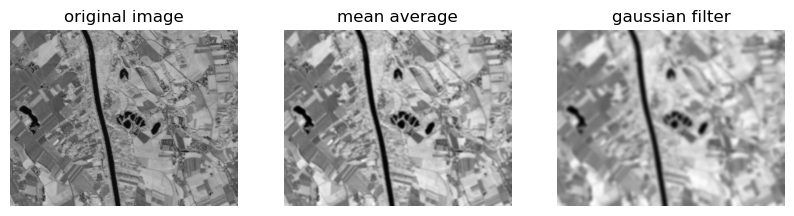

In [25]:
# box filter
kernel= np.ones((7,7))/49
box_filtered = convolve2d(img, kernel, mode='same', boundary='symm')

# gaussian filter
from scipy import ndimage as ndi
gaussian_filtered= ndi.gaussian_filter(img, sigma=5)

# display
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off")

axes[1].imshow(box_filtered,cmap='gray')
axes[1].set_title("mean average")
axes[1].axis("off")

axes[2].imshow(gaussian_filtered,cmap='gray')
axes[2].set_title("gaussian filter")
axes[2].axis("off")
plt.show()

4. Compare the results of different sharpening operators.

In [ ]:
# laplacian filter
laplace_filtered= ndi.laplace(img, ksize=3)

# 

5. Compare the results of different edge detection operators.

6. Are smoothing/sharpening operators invertible?

7. Compare the linear and nonlinear ltering operators.

8. Propose separable implementations of nonlinear operators.

9. Verify the ability of edge-preserving smoothing lters.